# Are Middle Eastern Countries Truly the Epicenter of Terrorism?

### Kevin Zhang

Data Science Spring 2017

3/21/2017

#### Documentation/Reference/Works Cited

Data Source:
https://www.start.umd.edu/gtd/

Data Documentation, Variables, Legend:
https://www.start.umd.edu/gtd/downloads/Codebook.pdf

## About this Notebook

This notebook contains all the source code for the data science report done on the question of whether terrorist attacks are truly location specific, and whether middle eastern countries actually fit the stereotype that all terrorism just occurs there and ravages the region with constant turmoil and carnage. With so much fear and hate growing around the Middle Eastern area recently, I thought it would be helpful to add in my thoughts backed by data to help quell these rumors and stereotypes that are hurting Middle Eastern citizens of the US and other innocent people who have no ties to terrorists but are being discriminated against simply because of their associated birthplace.

The code below outlines my methodology for gathering, cleaning, and analyzing the data. Basically, I found a dataset from the Global Terrorism database, which is the most comprehensive database that includes virtually all recorded instances of terrorist attacks around the world from the 1970s to present. I discovered for a given incident, the database gave the country location, the fatalities of the incident, including deaths and wounded, and other useful attributes of the incident such as success, property damage, etc. I decided to measure the specificity of terrorist incidents based on their impact to the location of attack, mainly looking at casualties, as that is often looked to as the main result of terrorist attacks.

The main concepts used for analysis were OLS regression, PMFs and RMSE comparisons, which were deemed accurate enough for the purposes of this project. 

The overall result is that there doesn't seem to be much of a correlation between the country of that a terrorist incident occurs in and the number of casualties that arise. Given the regression results, it appears that knowing the location of the terrorist attacks gives you very little predictive power on the impact of the incident to the people of that location, and the p-values suggest that any possible correlation gleamed from the results could very well be due to chance. The RMSE agreed, as the difference between the variability of the predictions using the model and not using the model were almost negligible. This is reasonable, as it lends itself to the fact that terrorists are not an organized system that is entrenched in certain regions, but are much more impulsive groups of people with sometimes a clear drive for a specific goal but lack any sort of consistency in terms of making it happen. As such, it wouldn't be unreasonable to assume that a terrorist attack in the US and in Iraq could have the same likelihood of deadly impact. This supports the idea that the Middle East is not some fearful terror zone of mass destruction. Certain terrorist-heavy regions are not to be intrinsically blamed or shunned for the activities taking place around them; rather, these regions are more victims than perpetrators to unforunate conditions which has bred many terrorist organizations to clump in one place.

For a full breakdown of the code, feel free to continue reading.

In [62]:
%matplotlib inline

import numpy as np
import pandas as pd
import random
import thinkstats2
import thinkplot
import statsmodels.formula.api as smf


In [63]:
def clean_dataframe(df):
    """
    Takes the entire Pandas dataframe and cleans out all bad responses associated with the data that I am specifically
    looking to by replacing them with NaNs. 
    
    Then cleans out nans for usage in regression and other analysis.
    
    Input: Pandas dataframe
    Output: dataframe that has been cleaned out
    """
    df.property.replace([-9], np.nan, inplace=True)
    
    df['propdmg'] = df.property.dropna()
    df['wounded'] = df.nwound.dropna()
    df['fatals'] = df.nkill.dropna()
    
    return df

In [71]:
def make_and_plot_pmf(series, label):
    """
    Takes a category and makes a pmf. Then also plots the pmf using hist.
    
    Input: Category string
    Output: pmf plot
    """
    series_pmf = thinkstats2.Pmf(series, label=label)
    thinkplot.Pmf(series_pmf)
    thinkplot.Config(xlabel=label, ylabel="pmf", loc="upper right")


In [80]:
def calculate_RMSE(endog, r):
    """
    Takes a dependent variables Pandas series and its corresponding coefficient of determination and 
    calculates the RSME of the variable with and without using the regression model
    
    Input: Pandas series, R-value
    Output:RMSE without, RMSE with model
    """
    RMSEraw = endog.std()
    var_ys = RMSEraw**2
    r2 = r
    var_res = (1 - r2) * var_ys
    RMSEmodel = np.sqrt(var_res)
    
    return RMSEraw, RMSEmodel

In [67]:
def OLS_reg(formula, df):
    """
    Takes in a pre-written formula and calculates the Ordinary Least Squares Regression on it
    
    Input: formula string
    Output: OLS regression results summary
    """
    model = smf.ols(formula, data=df)
    results = model.fit()
    return results.summary()
    

This reads in and cleans up the dataset for terrorism, the dataset collected by the Global Terrorism Database from
1970s to present time.

For more information on what each of the variables stand for or how they are evaluated, take a look at the 
Documentation link above

In [68]:
terrorism = pd.read_excel('../../terrorism.xlsx')
terrorism = clean_dataframe(terrorism)

This displays the first 5 rows of the dataframe, for visualization convenience

In [3]:
terrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,0,0,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Basic Visualizations

The following graphs are Pmfs of the various variables I will be using, just to visualize what each of them look like
and to potentially gain some insight on each of them

Below is a Pmf of the numbers of deaths in each incident. Note that surprisingly, most incidents resolve without any
fatalities, although some can stretch to over a thousand dead.

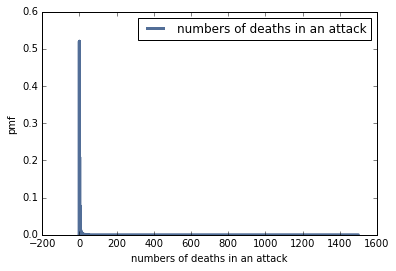

In [72]:
make_and_plot_pmf(terrorism.nkill, "numbers of deaths in an attack")

Below is a Pmf of the numbers of wounded in each incident. Note that surprisingly once again, most incidents resolve without any casualties, although some can stretch to over multiple thousands wounded.

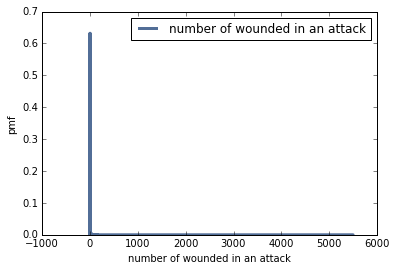

In [74]:
make_and_plot_pmf(terrorism.wounded, "number of wounded in an attack")

Below is a Pmf showing the number of terrorist incident recorded for each country around the globe, where each country
is denoted by a categorical number. Note that the largest peak, number 95, corresponds to Iraq. The US, which is number 217, is actually much smaller in comparison to much of the terrorism incidents that occur around the world.

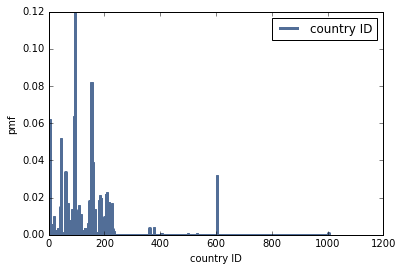

In [73]:
make_and_plot_pmf(terrorism.country, "country ID")

Below is a Pmf showing the showing whether property damage occurred at each incident. Note that for this category, it appears that the distribution favors more property damage, so it seems at first glance that a terrorist incident will likely include some form of property costs because of damage, explosion, etc.

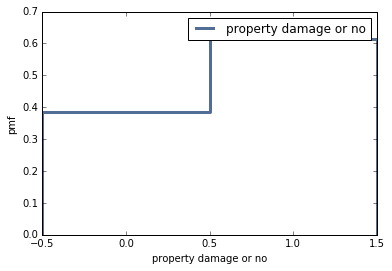

In [75]:
make_and_plot_pmf(terrorism.propdmg, "property damage or no")

Below if a Pmf showing the success of a terrorist incident. Notice that virtually every incident is deemed a success by the database. However, upon reading the documentation, it appears that "success" is considered achieved is something happens at the location of the incident. For example, if the method of attack was a bombing assault, and if one bomb goes off, then that is considered a success, even if the bomb did not damage any property or injure anyone. Because this category is so inclusive, we will not be using in the actual analysis. It is left here to show that it was once considered, but further scrutiny ruled it out.

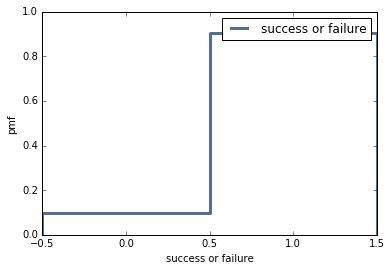

In [76]:
make_and_plot_pmf(terrorism.success, "success or failure")

### Analysis

The following cells show the analysis used in this report. 

First, to measure whether or not the country had any predictive power on the fatality of the incident, I used an OLS regression engine to see if such a correlation existed.

In [78]:
fatalsReg = OLS_reg("fatals ~ C(country)", terrorism)
fatalsReg

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 fatals   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     20.30
Date:                Mon, 20 Mar 2017   Prob (F-statistic):               0.00
Time:                        23:36:24   Log-Likelihood:            -5.6776e+05
No. Observations:              147827   AIC:                         1.136e+06
Df Residuals:                  147624   BIC:                         1.138e+06
Df Model:                         202                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              2.8530      0.116     24.627      0.000         2.626     3.080
C(country)[T.5]       -2.2777      1.325     -1.720      0.086        -4.874     0.318
C(country)[T.6]        1.2590      0.246      5.115      0.000         0.777     1.741
C(country)[T.7]     -5.79e-14   4.32e-14     -1.340      0.180     -1.43e-13  2.68e-14
C(country)[T.8]        3.5118      0.529      6.638      0.000         2.475     4.549
C(country)[T.10]    2.065e-14   4.92e-14      0.419      0.675     -7.58e-14  1.17e-13
C(country)[T.11]      -2.1776      0.435     -5.009      0.000        -3.030    -1.326
C(country)[T.12]      -1.4439      2.406     -0.600      0.548        -6.160     3.272
C(country)[T.14]      -2.6295      1.228     -2.141      0.032        -5.037    -0.222
C(country)[T.15]      -2.5758      1.128     -2.284      0.022        -4.786    -0.365
C(country)[T.16]       3.1470      1.743      1.805      0.071        -0.270     6.564
C(country)[T.17]      -2.6530      5.043     -0.526      0.599       -12.537     7.231
C(country)[T.18]      -2.6486      0.846     -3.131      0.002        -4.307    -0.991
C(country)[T.19]      -2.1012      0.314     -6.689      0.000        -2.717    -1.486
C(country)[T.20]      22.4803      6.510      3.453      0.001         9.721    35.239
C(country)[T.21]      -2.5470      0.981     -2.597      0.009        -4.469    -0.625
C(country)[T.22]      -2.4780      3.987     -0.621      0.534       -10.293     5.337
C(country)[T.23]      -2.8530      3.987     -0.715      0.474       -10.668     4.962
C(country)[T.25]      -1.0530      5.043     -0.209      0.835       -10.937     8.831
C(country)[T.26]      -2.7041      0.681     -3.969      0.000        -4.039    -1.369
C(country)[T.28]      -2.3466      0.910     -2.579      0.010        -4.130    -0.563
C(country)[T.29]      -1.4780      3.987     -0.371      0.711        -9.293     6.337
C(country)[T.30]      -2.0482      0.721     -2.841      0.004        -3.461    -0.635
C(country)[T.31]      -2.8530     11.274     -0.253      0.800       -24.950    19.244
C(country)[T.32]      -2.2816      1.615     -1.413      0.158        -5.446     0.883
C(country)[T.33]      -1.7280      3.987     -0.433      0.665        -9.543     6.087
C(country)[T.34]       5.4126      0.519     10.433      0.000         4.396     6.429
C(country)[T.35]      -1.6863      3.256     -0.518      0.605        -8.069     4.696
C(country)[T.36]      -0.6457      0.728     -0.887      0.375        -2.073     0.781
C(country)[T.37]       8.2009      0.880      9.319      0.000         6.476     9.926
C(country)[T.38]       1.8456      1.325      1.393      0.164        -0.750     4.442
C(country)[T.41]       3.5015      0.828      4.228      0.000         1.878     5.125
C(country)[T.42]      10.9470      1.3

Looking at the results of the regression, the R-squared value is very low, showing little predictive power. The p-values for the countries are all over the place, from being 0 (very statistically significant) to being almost 1 (quite likely to be due to chance). As such, it appears that there death toll from terrorist incidents is not related to the location of where it occurred.

The calculation of the RMSEs with and without the model also proves this idea:

In [82]:
Rwithout, Rwith = calculate_RMSE(terrorism.fatals, .027)
Rwithout, Rwith

(11.421270347657396, 11.266028142726814)

Next, we looked at the wounded count and whether location of the incident had any predictive power on the number of wounded people from an incident. Again, I used OLS regression to see any correlation existed.

In [83]:
woundedReg = OLS_reg("wounded ~ C(country)", terrorism)
woundedReg

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                wounded   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     6.612
Date:                Mon, 20 Mar 2017   Prob (F-statistic):          3.28e-165
Time:                        23:42:31   Log-Likelihood:            -6.4694e+05
No. Observations:              142572   AIC:                         1.294e+06
Df Residuals:                  142369   BIC:                         1.296e+06
Df Model:                         202                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              3.4548      0.237     14.607      0.000         2.991     3.918
C(country)[T.5]       -1.7288      2.659     -0.650      0.516        -6.941     3.484
C(country)[T.6]        0.0212      0.502      0.042      0.966        -0.964     1.006
C(country)[T.7]     2.724e-14   9.06e-14      0.301      0.764      -1.5e-13  2.05e-13
C(country)[T.8]        1.0080      1.084      0.930      0.352        -1.116     3.132
C(country)[T.10]    -1.14e-14   9.62e-14     -0.119      0.906        -2e-13  1.77e-13
C(country)[T.11]      -2.4177      0.873     -2.771      0.006        -4.128    -0.707
C(country)[T.12]      -0.1215      4.944     -0.025      0.980        -9.813     9.570
C(country)[T.14]      -2.3715      2.481     -0.956      0.339        -7.234     2.491
C(country)[T.15]      -2.2073      2.264     -0.975      0.330        -6.646     2.231
C(country)[T.16]       0.7270      3.420      0.213      0.832        -5.976     7.430
C(country)[T.17]      -3.4548     10.124     -0.341      0.733       -23.298    16.389
C(country)[T.18]      -2.5604      1.703     -1.503      0.133        -5.899     0.778
C(country)[T.19]       1.8722      0.634      2.953      0.003         0.629     3.115
C(country)[T.20]      -2.4548     13.069     -0.188      0.851       -28.070    23.160
C(country)[T.21]      -1.6787      1.969     -0.852      0.394        -5.539     2.181
C(country)[T.22]      -3.4548      8.005     -0.432      0.666       -19.145    12.235
C(country)[T.23]      -2.3120      8.558     -0.270      0.787       -19.085    14.461
C(country)[T.25]      -2.4548     10.124     -0.242      0.808       -22.298    17.389
C(country)[T.26]      -2.8620      1.373     -2.084      0.037        -5.553    -0.171
C(country)[T.28]      -2.4933      1.827     -1.364      0.172        -6.075     1.088
C(country)[T.29]      -2.0798      8.005     -0.260      0.795       -17.770    13.610
C(country)[T.30]      -2.8071      1.459     -1.923      0.054        -5.667     0.053
C(country)[T.31]      -2.4548     22.634     -0.108      0.914       -46.817    41.907
C(country)[T.32]      -2.7548      3.209     -0.858      0.391        -9.045     3.536
C(country)[T.33]      -2.2326      7.548     -0.296      0.767       -17.026    12.561
C(country)[T.34]       1.0484      1.072      0.978      0.328        -1.052     3.148
C(country)[T.35]      14.2118      6.538      2.174      0.030         1.398    27.026
C(country)[T.36]      -0.2467      1.465     -0.168      0.866        -3.118     2.625
C(country)[T.37]       0.4270      2.022      0.211      0.833        -3.536     4.390
C(country)[T.38]      -2.4548      2.659     -0.923      0.356        -7.667     2.758
C(country)[T.41]      -0.1278      1.810     -0.071      0.944        -3.676     3.421
C(country)[T.42]      20.6049      2.7

Looking at the results of the regression, the R-squared value is even lower this time surprisingly, showing even less little predictive power than for death count. The p-values for the countries are all over the place, from being 0 (very statistically significant) to being almost 1 (quite likely to be due to chance). As such, it appears that terrorist incidents are not region-specific, and two very different locations could have an equally likely chance of experiencing a catastrophic terrorist attack, should one occur.

The calculation of the RMSEs with and without the model also proves this idea:

In [84]:
Rwithout, Rwith = calculate_RMSE(terrorism.wounded, .009)
Rwithout, Rwith

(22.722313053878182, 22.619831540570253)

As a final tidbit, I tried to include more categorical variables as well, such as property damage and success, even whether the country of attack matched the nationality of the target. Unfortunately, for some reason, I received an error that I couldn't resolve no matter what. Looking for hours on the internet, I discovered that a few others have had the exact same problem I had, and that even the statsmodels creators themselves stated that there was no easy fix to the problem. I will include a link to a post I found relevant to this error and lack of solution to this problem. I will show the error for the purposes of documentation, in the hopes that someone else will be able to resolve this someday after me.

Link to problem: http://stackoverflow.com/questions/27413873/statsmodels-logistic-regression-convergence-problems

In [85]:
model = smf.logit("propdmg ~ C(country)", data=terrorism)
results = model.fit()
results.summary()

         Current function value: 0.620612
         Iterations: 35


LinAlgError: Singular matrix